<a href="https://colab.research.google.com/github/silviaarellanogarcia/HackEPS2022/blob/main/missi%C3%B3_lila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💜 MISSIÓ LILA 💜

## Objectius 

Volem que implementeu un model o algoritme que permeti classificar del dataset A2 si aquella imatge hi ha error o no. Ens agradaria que mostressiu alguna gràfica de l'entrenament del model (en cas de fer ML) o mètriques qualitatives ( accuracy, recall, f1...) i quantitatives (matrius de confusió, ROC curve...).

# Setup

Install libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Mount drive volume into google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Extreure les dades

Unziped all images and information to our drive

In [ ]:
#!unzip "gdrive/MyDrive/HackEPS2022/data/A1.zip" -d "gdrive/MyDrive/HackEPS2022/data/lila"

Loading all information into a dataframe

In [ ]:
train_df = pd.read_csv("gdrive/MyDrive/HackEPS2022/groc.csv")
train_df.shape

(3211, 7)

##Preprocessing

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3211 non-null   int64 
 1   c           3211 non-null   object
 2   r           3211 non-null   object
 3   e           3211 non-null   object
 4   name        3211 non-null   object
 5   path        3211 non-null   object
 6   tipus       3211 non-null   object
dtypes: int64(1), object(6)
memory usage: 175.7+ KB


In [ ]:
train_df.head(15)

,Unnamed: 0,c,r,e,name,path,tipus
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Quart teixit
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Quart teixit
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Quart teixit
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Quart teixit
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Quart teixit
5,5,c3,r1,e3,c3r1e3n43,badata/cd1/data/c3/r1/images/e3/c3r1e3n43.tif,Quart teixit
6,6,c3,r1,e3,c3r1e3n5,badata/cd1/data/c3/r1/images/e3/c3r1e3n5.tif,Quart teixit
7,7,c3,r1,e3,c3r1e3n44,badata/cd1/data/c3/r1/images/e3/c3r1e3n44.tif,Quart teixit
8,8,c3,r1,e3,c3r1e3n30,badata/cd1/data/c3/r1/images/e3/c3r1e3n30.tif,Quart teixit
9,9,c3,r1,e3,c3r1e3n41,badata/cd1/data/c3/r1/images/e3/c3r1e3n41.tif,Quart teixit


Translating the string into id types

In [ ]:
translator = {"Estampado": 0, "Primer teixit": 1, "Segon teixit": 2, "Tercer teixit": 3, "Quart teixit": 4, "Cinqué teixit": 5}
train_df["tipus"] = train_df.tipus.map(lambda row_tipus: translator.get(row_tipus))

Getting rid of the unnecessary data, we only want path and the type id

In [ ]:
train_df = train_df[["path", "tipus"]]


In [ ]:
train_df.head()

,path,tipus
0,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,4
1,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,4
2,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,4
3,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,4
4,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,4


We don't want to add unwanted relationsships between types and so we one-hot encoded the type ids

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encod = OneHotEncoder()

encod.fit(train_df[['tipus']])
patterns = encod.transform(train_df[['tipus']]).toarray()

In [ ]:
train_df[['0', '1', '2', '3', '4', '5']] = patterns

In [ ]:
train_df.head()

,path,tipus,0,1,2,3,4,5
0,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
1,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
2,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
3,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
4,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
3206,badata/cd1/data/c1/r3/images/e5/c1r3e5n19.tif,1,0.0,1.0,0.0,0.0,0.0,0.0
3207,badata/cd1/data/c1/r3/images/e5/c1r3e5n48.tif,1,0.0,1.0,0.0,0.0,0.0,0.0
3208,badata/cd1/data/c1/r3/images/e5/c1r3e5n18.tif,1,0.0,1.0,0.0,0.0,0.0,0.0
3209,badata/cd1/data/c1/r3/images/e5/c1r3e5n1.tif,1,0.0,1.0,0.0,0.0,0.0,0.0


Getting the index patterns names

In [ ]:
index_patterns = train_df.columns[2:]

## Model preprocessing

In [ ]:
import cv2, os
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf

Creating a generator in order to consume less RAM.

 

*   Before iterating we shuffle the dataframe so that the model don't get used to a single type.
*   Replacing the path in order to get the image from our drive
*   Reshaping the images to fit to the model training shape needs




In [ ]:
IMG_SIZE = 224
images = []
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

def get_images():
  shffled_train_df = train_df.sample(frac=1)
  for index, row in shffled_train_df.iterrows():
    path = row.path
    path = path.replace("badata/cd1/data/", "gdrive/MyDrive/HackEPS2022/data/lila/A1/")
    try:
        img_arr = cv2.imread(path)
        resized_arr = resize_and_rescale(img_arr) # Reshaping images to preferred size
        yield tf.reshape(resized_arr, (1, 224,224,3)), tf.reshape(tf.convert_to_tensor(row[index_patterns], dtype=tf.float32), (1, 6))
    except Exception as e:
        pass

Finally not used, but we created another generator that augment images doing transformations to them. We didn't implement this because then the randomness of each type is lost.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

def augment_images():
  for image, image_tag in get_images():
    yield image, image_tag
    for _ in range(5):
      augmented_image = data_augmentation(image)
      yield augmented_image, image_tag

Creating the dataset from the generator

In [ ]:
dataset = tf.data.Dataset.from_generator(
     get_images,
     output_signature=(
         tf.TensorSpec(shape=(1, 224,224,3), dtype=tf.float32),
         tf.TensorSpec(shape=(1, 6), dtype=tf.float32)))

Splitting the dataset into test_dataset and train_dataset, this is done by enumerating all the instances and then getting the ones that their index is divisor by 4.

In [ ]:
# Splitting the dataset for training and testing.
def is_test(x, _):
    return x % 4 == 0


def is_train(x, y):
    return not is_test(x, y)


recover = lambda x, y: y

# Split the dataset for training.
test_dataset = dataset.enumerate() \
    .filter(is_test) \
    .map(recover)

# Split the dataset for testing/validation.
train_dataset = dataset.enumerate() \
    .filter(is_train) \
    .map(recover)

## Modeling

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 200x200 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3), padding="same"),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# The third convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# The fourth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# # The fifth convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(2,2),
# Flatten the results to feed into a DNN
tf.keras.layers.Flatten(),
# 512 neuron hidden layer
tf.keras.layers.Dense(512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model2 = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=6,
)

In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Training the model

In [ ]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
     24/Unknown - 12s 468ms/step - loss: 1.7709 - accuracy: 0.2500

    552/Unknown - 161s 291ms/step - loss: 1.7750 - accuracy: 0.2120

    735/Unknown - 215s 291ms/step - loss: 1.7681 - accuracy: 0.2340

   1257/Unknown - 364s 289ms/step - loss: 1.7582 - accuracy: 0.2347

   1465/Unknown - 426s 290ms/step - loss: 1.7544 - accuracy: 0.2328

   1949/Unknown - 564s 289ms/step - loss: 1.7424 - accuracy: 0.2401

   2403/Unknown - 695s 289ms/step - loss: 1.7316 - accuracy: 0.2401

2403/2403 [==============================] - 777s 323ms/step - loss: 1.7316 - accuracy: 0.2401 - val_loss: 1.6781 - val_accuracy: 0.2444
Epoch 2/5
 475/2403 [====>.........................] - ETA: 2:42 - loss: 1.6336 - accuracy: 0.2758

 730/2403 [========>.....................] - ETA: 2:20 - loss: 1.6358 - accuracy: 0.2630

 758/2403 [========>.....................] - ETA: 2:18 - loss: 1.6352 - accuracy: 0.2652

1157/2403 [=============>................] - ETA: 1:44 - loss: 1.6294 - accuracy: 0.3207

1315/2403 [===============>..............] - ETA: 1:31 - loss: 1.6297 - accuracy: 0.3384

2403/2403 [==============================] - ETA: 0s - loss: 1.6038 - accuracy: 0.3983

2403/2403 [==============================] - 252s 105ms/step - loss: 1.6038 - accuracy: 0.3983 - val_loss: 1.5076 - val_accuracy: 0.5050
Epoch 3/5
  64/2403 [..............................] - ETA: 3:39 - loss: 1.5143 - accuracy: 0.5000

 656/2403 [=======>......................] - ETA: 2:37 - loss: 1.4873 - accuracy: 0.4970

 831/2403 [=========>....................] - ETA: 2:25 - loss: 1.4777 - accuracy: 0.4922

1090/2403 [============>.................] - ETA: 1:59 - loss: 1.4770 - accuracy: 0.4826

1384/2403 [================>.............] - ETA: 1:32 - loss: 1.4554 - accuracy: 0.4949

1593/2403 [==================>...........] - ETA: 1:12 - loss: 1.4514 - accuracy: 0.4896

2403/2403 [==============================] - ETA: 0s - loss: 1.4076 - accuracy: 0.4956

2403/2403 [==============================] - 269s 112ms/step - loss: 1.4076 - accuracy: 0.4956 - val_loss: 1.3144 - val_accuracy: 0.4825
Epoch 4/5
 242/2403 [==>...........................] - ETA: 3:07 - loss: 1.2858 - accuracy: 0.5083

 753/2403 [========>.....................] - ETA: 2:23 - loss: 1.2490 - accuracy: 0.5139

1231/2403 [==============>...............] - ETA: 1:41 - loss: 1.2337 - accuracy: 0.5085

1523/2403 [==================>...........] - ETA: 1:15 - loss: 1.2239 - accuracy: 0.5043

1765/2403 [=====================>........] - ETA: 54s - loss: 1.2139 - accuracy: 0.5059

2170/2403 [==========================>...] - ETA: 20s - loss: 1.1949 - accuracy: 0.5115

2403/2403 [==============================] - ETA: 0s - loss: 1.1896 - accuracy: 0.5114

2403/2403 [==============================] - 257s 107ms/step - loss: 1.1896 - accuracy: 0.5114 - val_loss: 1.0902 - val_accuracy: 0.5786
Epoch 5/5
 846/2403 [=========>....................] - ETA: 2:13 - loss: 1.0333 - accuracy: 0.6655

1293/2403 [===============>..............] - ETA: 1:37 - loss: 1.0168 - accuracy: 0.6489

1558/2403 [==================>...........] - ETA: 1:13 - loss: 1.0072 - accuracy: 0.6418

1612/2403 [===================>..........] - ETA: 1:08 - loss: 1.0065 - accuracy: 0.6408

1773/2403 [=====================>........] - ETA: 54s - loss: 1.0014 - accuracy: 0.6379

1924/2403 [=======================>......] - ETA: 41s - loss: 1.0006 - accuracy: 0.6440

2403/2403 [==============================] - ETA: 0s - loss: 0.9858 - accuracy: 0.6496

2403/2403 [==============================] - 256s 106ms/step - loss: 0.9858 - accuracy: 0.6496 - val_loss: 0.8866 - val_accuracy: 0.7269


# Generating plots from the training

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


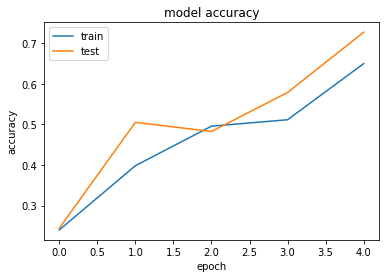

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


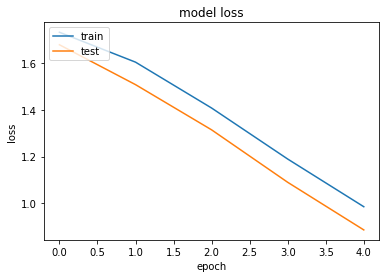

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mejoras

- Data Augmentation

- Activación RELU entre capas de la arquitectura (Revisar arquitectura)

